# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | aykhal
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pasaco
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | bergerac
Processing Record 9 of Set 1 | samana
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | salinopolis
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | langenburg
Processing Record 15 of Set 1 | brae
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | cody
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | barra do garcas
Processing Record 23 of Set 1 | nyurba
Processing Re

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,22.18,94,100,5.66,US,1675547599
1,aykhal,66.0000,111.5000,-38.05,100,84,1.04,RU,1675547831
2,mar del plata,-38.0023,-57.5575,22.13,69,0,5.66,AR,1675547831
3,busselton,-33.6500,115.3333,22.63,43,75,3.19,AU,1675547832
4,pasaco,13.9772,-90.2064,34.22,32,18,2.70,GT,1675547833


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,22.18,94,100,5.66,US,1675547599
1,aykhal,66.0000,111.5000,-38.05,100,84,1.04,RU,1675547831
2,mar del plata,-38.0023,-57.5575,22.13,69,0,5.66,AR,1675547831
3,busselton,-33.6500,115.3333,22.63,43,75,3.19,AU,1675547832
4,pasaco,13.9772,-90.2064,34.22,32,18,2.70,GT,1675547833


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

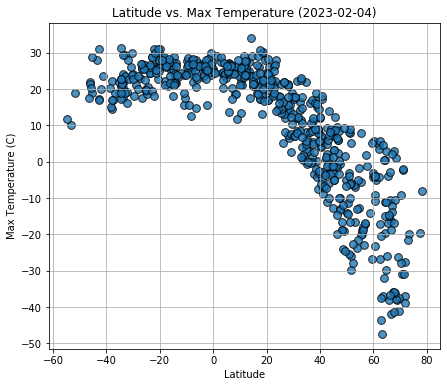

In [95]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind = "scatter",
                  x = "Lat", 
                  y= "Max Temp", 
                  edgecolors= "black", 
                  alpha= 0.8,
                  s = 60,
                  figsize = (7,6),
                  grid = True)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (2023-02-04)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

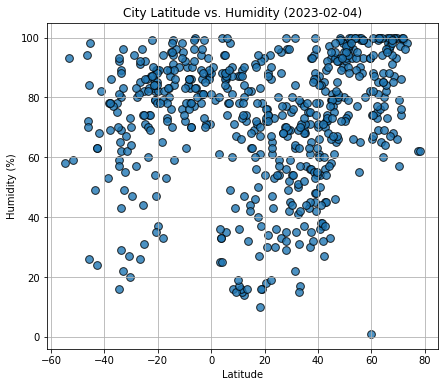

In [96]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind = "scatter",
                  x = "Lat", 
                  y= "Humidity", 
                  edgecolors= "black", 
                  alpha= 0.8,
                  s = 60,
                  figsize = (7,6),
                  grid = True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-04)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

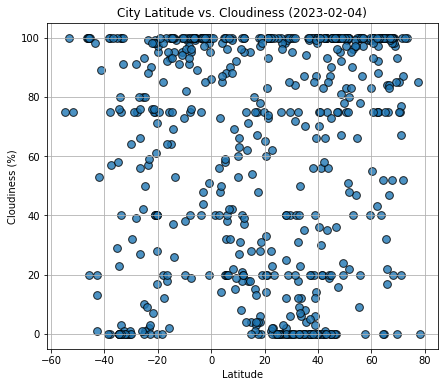

In [98]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind = "scatter",
                  x = "Lat", 
                  y= "Cloudiness", 
                  edgecolors= "black", 
                  alpha= 0.8,
                  s = 60,
                  figsize = (7,6),
                  grid = True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-04)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

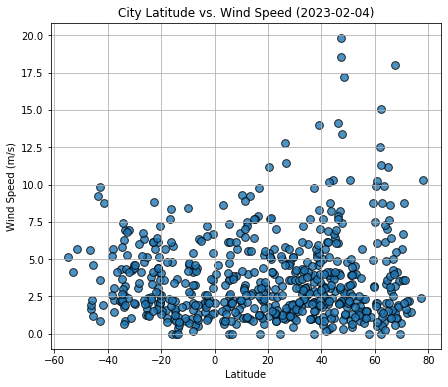

In [100]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind = "scatter",
                  x = "Lat", 
                  y= "Wind Speed", 
                  edgecolors= "black", 
                  alpha= 0.8,
                  s = 60,
                  figsize = (7,6),
                  grid = True)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-02-04)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,22.18,94,100,5.66,US,1675547599
1,aykhal,66.0000,111.5000,-38.05,100,84,1.04,RU,1675547831
4,pasaco,13.9772,-90.2064,34.22,32,18,2.70,GT,1675547833
5,saskylakh,71.9167,114.0833,-36.88,99,87,1.37,RU,1675547678
6,cherskiy,68.7500,161.3000,-38.11,100,97,1.93,RU,1675547788


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mar del plata,-38.0023,-57.5575,22.13,69,0,5.66,AR,1675547831
3,busselton,-33.6500,115.3333,22.63,43,75,3.19,AU,1675547832
11,salinopolis,-0.6136,-47.3561,25.71,87,98,5.44,BR,1675547642
15,mataura,-46.1927,168.8643,21.93,72,100,1.67,NZ,1675547638
16,rikitea,-23.1203,-134.9692,26.08,74,2,6.17,PF,1675547636


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8557701874091785


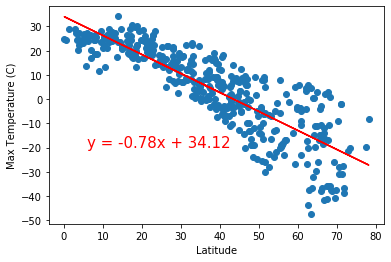

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,-20),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

The r-value is:0.35005050617795413


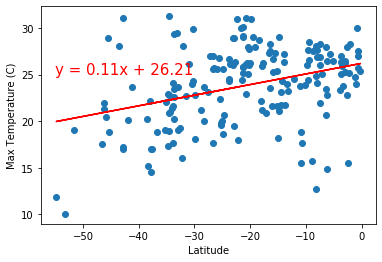

In [122]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between Latitude and Max Temperature on the Northern Hemisphere. However, we see a weak positive correlation between Latitude and Max Temperature for the Southern Hemisphere. This is expected as temperatures are usually colder as you approach the poles and warmer as you approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3614078884518143


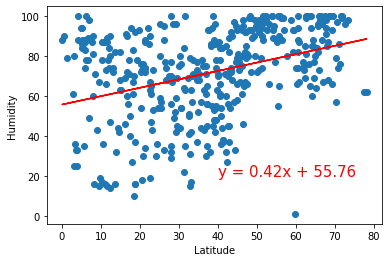

In [125]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

The r-value is:0.36695793127139725


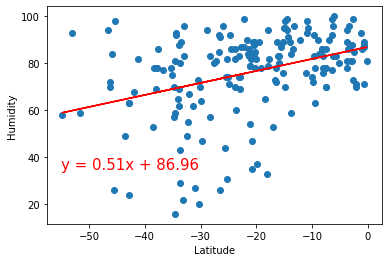

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** We see a weak positive correlation between Latitude and Humidity for both the Southern and Northern Hemisphere. This means that if latitude is higher, humidity also rises. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.2694513777713834


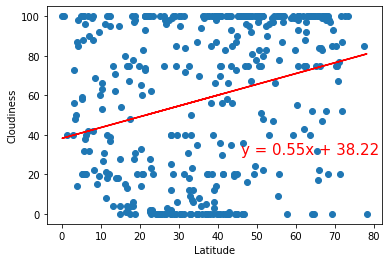

In [144]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,30),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

The r-value is:0.30763153395813037


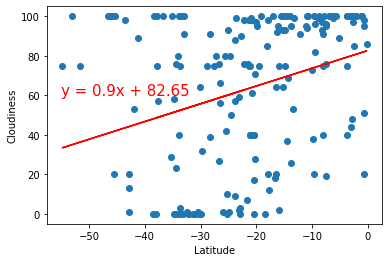

In [128]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** We see a weak positive correlation between Latitude and Humidity for both the Southern and Northern Hemisphere. However, this is a very weak correlation, leading us to believe that Latitude doesn't affect Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.06295596301899055


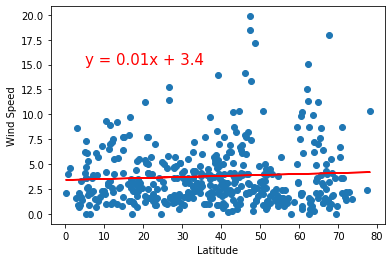

In [136]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

The r-value is:-0.21325300890801221


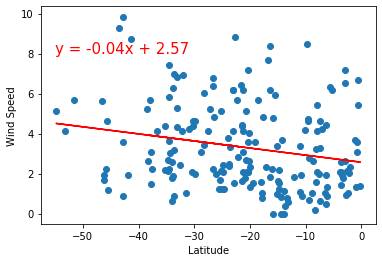

In [137]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# linregress method
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatterplot
plt.scatter(x_values,y_values)

# drafting line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")

# labels and print rvalue
print(f"The r-value is:{rvalue}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

**Discussion about the linear relationship:** We see a weak negative correlation between Latitude and Wind Speed for the Southern and we see no correlation for the Latitude and Wind Speed. However, the negative correlation is a very weak correlation, leading us to believe that Latitude doesn't affect Wind speed.